In [ ]:
#Alexander Ershov-Youtube channel

1.type of the problem: binary classification
input:text
output: bad or good comment
2. metrics and constraints
we dont want to delete the comments which are positive by mistake
to constrain this possbility, let's put constraint : algorithm can make mistake in 1 out of 20 cases
2 metrics are: Recall and presicion
Recall is ratio of found bad comments. If recall is 1, then we found all bad comments
We need to maximise Recall.
Precision is probability that if we found that bad comment is bad, then it is bad in reality.
Our constraint will be such that Precision must be > 0.95

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("labeled.csv", sep=",")

In [3]:
df.shape

(14412, 2)

In [4]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [5]:
df["toxic"]=df.toxic.apply(int)

In [6]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [7]:
df.toxic.value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [8]:
for c in df[df["toxic"]==1]["comment"].head(5):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [9]:
for c in df[df["toxic"]==0]["comment"].head(5):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [10]:
train_df, test_df=train_test_split(df, test_size=500)

In [11]:
test_df.shape

(500, 2)

In [12]:
test_df.toxic.value_counts()

0    343
1    157
Name: toxic, dtype: int64

In [13]:
train_df.toxic.value_counts()

0    9243
1    4669
Name: toxic, dtype: int64

In [14]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
sentence_example=df.iloc[1]["comment"]
tokens=word_tokenize(sentence_example, language="russian")
tokens_without_punctuation=[i for i in tokens if i not in string.punctuation]
russian_stop_words=stopwords.words("russian")
tokens_without_stop_words_and_punctuation=[i for i in tokens_without_punctuation if i not in russian_stop_words ]
snowball=SnowballStemmer(language="russian")
stemmed_tokens=[snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [16]:
sentence_example

'Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.\n'

In [17]:
snowball=SnowballStemmer(language="russian")
russian_stopwords=stopwords.words("russian")

def tokenize_sentence(sentence:str, remove_stopwords:bool= True):
    tokens=word_tokenize(sentence, language="russian")
    tokens=[i for i in tokens if i not in string.punctuation]
    if remove_stopwords:
        tokens=[i for i in tokens if i not in russian_stopwords]
    tokens=[snowball.stem(i) for i in tokens]
    return tokens

In [18]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer=TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stopwords=True))

In [21]:
features=vectorizer.fit_transform(train_df["comment"])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model=LogisticRegression(random_state=0)
model.fit(features, train_df["toxic"])

LogisticRegression(random_state=0)

In [24]:
model.predict(features[2])

array([1], dtype=int64)

In [25]:
train_df.comment.iloc[2]

'Геолог Георгий герой гей оргий\n'

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
#The purpose of pipeline is to assemble several steps 
#that can be cross-validated 
#while setting different parameters.

In [28]:
model_pipeline=Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stopwords=True))),
    ("model", LogisticRegression(random_state=0))
])

In [29]:
#to avoid giving as input the "features" as vectors, 
#we will instead input the text

In [30]:
model_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000024B725ABDC0>)),
                ('model', LogisticRegression(random_state=0))])

In [31]:
model_pipeline.predict(["А что если счётчики действительно могут сломаться до поверки (а поверка выполняется раз в 4-6 лет), в итоге будут насчитывать неправильно и вы будете недоплачивать (или переплачивать)? Это не нужно проверять, поверка, напоминаю, раз в 4 года минимум, вот сломается счётчик через 2 года после неё и 2 года вы хотите платить неправильно? Плюс давно известно, что жилищники ходят по квартирам и просто спрашивают показания счётчиков, может этим они бы и ограничились. Ну и грамотность - зависит от человека печатающего тексты, даже в официальных конторах (особенно уровня ЖКХ) не всегда грамотные люди сидят.\n"])

array([0], dtype=int64)

In [32]:
model_pipeline.predict(["нет нахуй "])

array([1], dtype=int64)

In [33]:
#seems to work but we need to measure metrics:
#precision and recall

In [34]:
from sklearn.metrics import precision_score, recall_score


In [35]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))

0.937007874015748

In [36]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))

0.7579617834394905

In [37]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve

In [38]:
prec, rec, thresholds=precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:,1])

2 metrics are: Recall and presicion
Recall is ratio of found bad comments. If recall is 1, then we found all bad comments
We need to maximise Recall.
Precision is probability that if we found that bad comment is bad, then it is bad in reality.
Our constraint will be such that Precision must be > 0.95

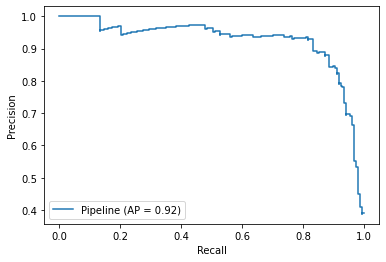

In [39]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [40]:
import numpy as np

In [41]:
np.where(prec>0.95)

(array([315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
        328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
        341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
        354, 355, 356, 357, 358, 359, 360, 361, 369, 370, 371, 372, 373,
        374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
        387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
        400, 401, 402], dtype=int64),)

In [43]:
thresholds[315]

0.6126815383846488

In [72]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:,1]>thresholds[315])

0.9533333333333334

In [44]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:,1]>thresholds[315])

0.5222929936305732

In [74]:
#GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid_pipeline=Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stopwords=True))),
    ("model",
    GridSearchCV(
                LogisticRegression(random_state=0),
                param_grid={'C':[0.1,1,10.]}, #regularization coefficient
                cv=3,# 3 folds
                verbose=4)   )#output all info
])

In [47]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.685, total=   1.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.686, total=   0.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ............................... C=0.1, score=0.684, total=   0.9s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] ................................. C=1, score=0.839, total=   2.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.838, total=   3.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.836, total=   2.1s
[CV] C=10.0 ..........................................................
[CV] .............................. C=10.0, score=0.871, total=   4.2s
[CV] C=10.0 ..........................................................


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .............................. C=10.0, score=0.862, total=   3.6s
[CV] C=10.0 ..........................................................


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.7s finished


[CV] .............................. C=10.0, score=0.865, total=   3.1s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000024B7A4E3820>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [48]:
model_pipeline_C10=Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stopwords=True))),
    ("model", LogisticRegression(random_state=0, C=10))
])

In [49]:
model_pipeline_C10.fit(train_df["comment"], train_df["toxic"])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000024B7A54EAF0>)),
                ('model', LogisticRegression(C=10, random_state=0))])

In [50]:
prec_C10, rec_C10, thresholds_C10=precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline_C10.predict_proba(test_df["comment"])[:,1])

In [52]:
np.where(prec_C10>0.95)

(array([328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
        341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
        354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
        367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
        380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
        393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
        406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
        419, 420, 421], dtype=int64),)

In [54]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline_C10.predict_proba(test_df["comment"])[:,1]>thresholds_C10[328])

0.9565217391304348

In [53]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_C10.predict_proba(test_df["comment"])[:,1]>thresholds_C10[328])

0.5605095541401274